#  Web Services, Data Interfaces, and Interactivity

## Yelp API

- [Yelp](https://www.yelp.com) API allows interactions with their data

- Table of [endpoints](https://www.yelp.com/developers/documentation/v3/get_started)

- For example, [`business_search`](https://www.yelp.com/developers/documentation/v3/business_search) endpoint:  
    _Search for businesses by keyword, category, location, price level, etc._

## Yelp API

- Accessing Yelp API require a key

- API keys can be thought of your web application's login information

- Create your login and API key [here](https://www.yelp.com/developers/v3/manage_app)

- Usually API keys can be revoked; however, still need care
    e.g., do not store it on a public github repository!

- Personal preference: create external file and load as module: `myapikeys.py`

## Yelp API

- Yelp offers python package: [github](https://github.com/Yelp/yelp-fusion#code-samples)

- Other languages available (often is the case)

- Simplifies interaction with Yelp: e.g., you don't have to construct a GET URL string and use `wget`!

- [Interface libraries](https://github.com/Yelp/yelp-fusion/tree/master/fusion) for different backends

- [Yelp python example](https://github.com/Yelp/yelp-fusion/blob/master/fusion/python/sample.py) for accessing Yelp's data

In [1]:
## https://github.com/Yelp/yelp-fusion/blob/master/fusion/python/sample.py
!wget -nc https://raw.githubusercontent.com/Yelp/yelp-fusion/master/fusion/python/sample.py
import sample as s

File ‘sample.py’ already there; not retrieving.



- Note the functions calling `requests.request('GET', url, ...)`

- This line is what `wget` does but with python functions

- Let's search for "restaurants" in "isla vista, ca"

In [2]:
import myapikeys as m
import imp
imp.reload(m)

## API key is needed
s.API_KEY = m.apikeys['yelp']
s.query_api('restaurants','isla vista, ca')

Querying https://api.yelp.com/v3/businesses/search ...
3 businesses found, querying business info for the top result "Gg2ZHe57Ztuv8JaFj0mNhw" ...
Querying https://api.yelp.com/v3/businesses/Gg2ZHe57Ztuv8JaFj0mNhw ...
Result for business "Gg2ZHe57Ztuv8JaFj0mNhw" found:
{ 'alias': 'buddha-bowls-isla-vista',
  'categories': [ {'alias': 'newamerican', 'title': 'American (New)'},
                  {'alias': 'gourmet', 'title': 'Specialty Food'}],
  'coordinates': {'latitude': 34.41293, 'longitude': -119.85731},
  'display_phone': '(805) 961-4555',
  'hours': [ { 'hours_type': 'REGULAR',
               'is_open_now': True,
               'open': [ { 'day': 0,
                           'end': '2200',
                           'is_overnight': False,
                           'start': '0800'},
                         { 'day': 1,
                           'end': '2200',
                           'is_overnight': False,
                           'start': '0800'},
                         { 

In [3]:
s.SEARCH_LIMIT = 10 ## otherwise defaults to 3 results
out = s.search(s.API_KEY, 'mexican', 'goleta, ca');
out

Querying https://api.yelp.com/v3/businesses/search ...


{'businesses': [{'id': 'PNVbv2kyUIHeJTDPis2gRg',
   'alias': 'los-agaves-goleta-3',
   'name': 'Los Agaves',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/D1mYLRE9cVny7YShlCNJWQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/los-agaves-goleta-3?adjust_creative=F-sO9nAoCoJ039bk7YJunw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=F-sO9nAoCoJ039bk7YJunw',
   'review_count': 337,
   'categories': [{'alias': 'mexican', 'title': 'Mexican'},
    {'alias': 'bars', 'title': 'Bars'}],
   'rating': 4.0,
   'coordinates': {'latitude': 34.4295328259392,
    'longitude': -119.872238849032},
   'transactions': ['pickup', 'delivery'],
   'price': '$$',
   'location': {'address1': '7024 Market Pl Dr',
    'address2': '',
    'address3': '',
    'city': 'Goleta',
    'zip_code': '93117',
    'country': 'US',
    'state': 'CA',
    'display_address': ['7024 Market Pl Dr', 'Goleta, CA 93117']},
   'phone': '+18059684000',
   'display_phone': '(805) 96

## Custom package: FRED API

- [Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/) provides extensive economic data. 

- [API documentation](https://research.stlouisfed.org/docs/api/) including other offerings

- [GeoFRED](https://geofred.stlouisfed.org/) geographical economic data

- [FRED documentation](https://research.stlouisfed.org/docs/api/fred): Multiple languages available

- [Third-party python package for FRED](https://github.com/avelkoski/FRB)  
    To install `pip install FRB` 

In [4]:
## install directly from github
# !pip install git+https://github.com/avelkoski/FRB 
## install from PyPI - https://pypi.org/project/FRB/
!pip install FRB 

- After installing API library and optaining an API key, data can be retrieved

- [Endpoint documentation](https://research.stlouisfed.org/docs/api/fred/)

- For example, [this page](https://research.stlouisfed.org/docs/api/fred/category_series.html)

In [5]:
from fred import Fred
fr = Fred(api_key=m.apikeys['fred'], response_type='dict')

params = {
    'limit':2,
    'tag_names':'trade;goods'
}

res = fr.category.series(125,params=params)

for record in res:
    print(record)

{'frequency': 'Monthly', 'frequency_short': 'M', 'group_popularity': 27, 'id': 'AITGCBN', 'last_updated': Timestamp('2019-02-27 13:46:02'), 'notes': 'This advance estimate represents the current month statistics of nearly complete coverage. The current month statistics reflecting complete coverage is available on the Census website at the U.S. International Trade in Goods and Services report (FT-900) https://www.census.gov/foreign-trade/statistics/historical/index.html \n\nFor more information on data collection and methodology, see https://www.census.gov/econ/indicators/methodology.html', 'observation_end': Timestamp('2018-12-01 00:00:00'), 'observation_start': Timestamp('2018-12-01 00:00:00'), 'popularity': 5, 'realtime_end': Timestamp('2019-04-30 00:00:00'), 'realtime_start': Timestamp('2019-04-30 00:00:00'), 'seasonal_adjustment': 'Not Seasonally Adjusted', 'seasonal_adjustment_short': 'NSA', 'title': 'Advance U.S. International Trade in Goods: Balance', 'units': 'Millions of Dolla

/opt/conda/lib/python3.6/site-packages/fred/helpers/__init__.py:36: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  frame = frame.convert_objects(convert_numeric=True)


- Download real gross domestic product series

In [6]:
params = {
    'realtime_start':'1947-04-01', 
    'realtime_end':'2018-01-01'
}
out = fr.series.observations('A191RL1Q225SBEA', response_type='df', 
                         params=params)
out.head()

,date,realtime_end,realtime_start,value
0,1947-04-01,2018-01-01,2014-09-26,-0.4
1,1947-07-01,2018-01-01,2014-09-26,-0.4
2,1947-10-01,2018-01-01,2014-09-26,6.4
3,1948-01-01,2018-01-01,2014-09-26,6.0
4,1948-04-01,2018-01-01,2014-09-26,6.7


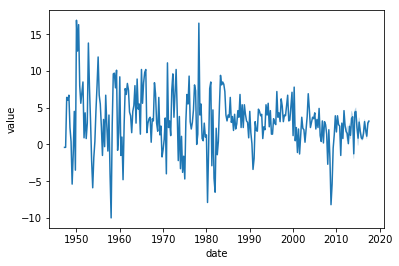

In [7]:
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.lineplot(out.date, out.value);